This document was created to investigate and apply neccessary additional data cleaning steps to the document `activities_cleaned.csv` located in `Running Analysis` folder.

In [41]:
import pandas as pd

import os


In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
# Get the current working directory
current_dir = os.getcwd()

# Parent Directory
parent_dir = os.path.dirname(current_dir)

# Running_Archive path
Running_archive_dir = os.path.join(parent_dir, 'Running Analysis')

# Working file
file_path = os.path.join(Running_archive_dir, 'activities_cleaned.csv')


In [44]:
df = pd.read_csv(file_path)

# Check for missing values 
missing_values = df.isnull().mean() * 100
print(missing_values[missing_values > 0])

# Generate descriptive statistic for numeric columns
df.describe()


Series([], dtype: float64)


,Activity ID,Max. Elevation (Raw),Min. Elevation (Raw),Elevation Gain (Raw),Elevation Loss (Raw),Average Heart Rate (bpm),Max. Heart Rate (bpm).1,Distance (Raw),Begin Latitude (Decimal Degrees Raw),Begin Longitude (Decimal Degrees Raw),End Latitude (Decimal Degrees Raw),End Longitude (Decimal Degrees Raw),Temperature (Raw),Wind Speed (Raw),Humidity (Raw)
count,1.550000e+02,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.534023e+09,383.125613,383.125613,158.055097,158.407484,174.148387,96.941935,26.776991,48.024921,7.826712,48.025003,7.819512,18.165806,9.948387,65.322581
std,2.847469e+08,117.063615,117.063615,119.421463,118.436687,5.275271,9.664662,251.049566,0.019401,0.057301,0.019344,0.055797,6.917693,5.588478,17.519538
min,9.083326e+08,159.800000,159.800000,3.000000,3.000000,135.000000,70.000000,2.701190,48.008097,7.534500,48.009655,7.535721,-2.800000,2.000000,26.000000
25%,1.297725e+09,307.245000,307.245000,70.000000,70.095000,173.000000,95.000000,5.016340,48.024921,7.826712,48.025003,7.819512,14.450000,5.000000,53.000000
50%,1.449839e+09,326.680000,326.680000,134.500000,132.610000,174.000000,97.000000,6.107940,48.024921,7.826712,48.025003,7.819512,18.900000,10.000000,64.000000
75%,1.743754e+09,456.705000,456.705000,217.270000,218.110000,176.000000,98.000000,7.773235,48.024921,7.826712,48.025003,7.819512,22.800000,13.000000,77.000000
max,2.284659e+09,756.600000,756.600000,622.000000,624.000000,192.000000,143.000000,3132.000000,48.261844,7.984675,48.261721,7.984625,32.800000,27.000000,100.000000


After working with the team, we discovered that some data types were incorrectly recorded as 'object' when they should not have been. This issue has created obstacles in progressing the project. To address this, we will now list all columns where the data type is 'object' and review them for necessary corrections.


In [45]:
objects_columns = df.select_dtypes(include=['object']).columns
print(objects_columns)

Index(['Activity Type', 'Begin Timestamp', 'End Timestamp',
       'Average Moving Speed', 'Average Speed', 'Max. Speed',
       'Duration (h:m:s)', 'Moving Duration (h:m:s)', 'Calories', 'Device',
       'Wind Direction', 'Condition', 'Rainfall'],
      dtype='object')


From the list, we can see that some variables should have different dtypes than object, we will dig deeper into these columns.

In [46]:
selected_columns = ['Average Moving Speed','Max. Speed','Average Speed','Duration (h:m:s)','Moving Duration (h:m:s)','Calories']

selected_columns_df = df[selected_columns]

selected_columns_df.head()


,Average Moving Speed,Max. Speed,Average Speed,Duration (h:m:s),Moving Duration (h:m:s),Calories
0,6:47,4:55,6:47,0:59:03,0:58:50,753
1,6:18,4:33,6:18,0:48:00,0:48:02,626
2,5:52,4:29,5:52,0:39:18,0:38:44,528
3,6:11,4:27,6:11,0:48:10,0:47:57,661
4,6:01,4:19,6:01,0:47:40,0:47:04,619


From here we will do neccessary transformation to these columns.
1. With speed columns: Convert from pace into km/ h.
2. With duration columns: Create duration (in seconds) columns.
3. With calories column: Directly convert to numeric with pandas.

In [47]:
# 1. Converting pace to km/ h
## During the process, we figured out there is one data point has incorrect input format for `Average Moving Speed` (indx 88).
## To reduce complexity, we manually editted this value in Excel. 

def pace_to_speed(pace):
    parts = pace.split(':')
    minutes, seconds = map(int, parts)
    pace_in_sec = (minutes * 60) + seconds
    speed_kmh = 3600.0 / pace_in_sec
    return speed_kmh

#Apply converter
df['Average Moving Speed'] = df['Average Moving Speed'].apply(pace_to_speed)
df['Max. Speed'] = df['Max. Speed'].apply(pace_to_speed)
df['Average Speed'] = df['Average Speed'].apply(pace_to_speed)


In [48]:
# Check the result
print(df[['Average Moving Speed', 'Max. Speed', 'Average Speed']].head())
print(df[['Average Moving Speed', 'Max. Speed', 'Average Speed']].isnull().sum())

   Average Moving Speed  Max. Speed  Average Speed
0              8.845209   12.203390       8.845209
1              9.523810   13.186813       9.523810
2             10.227273   13.382900      10.227273
3              9.703504   13.483146       9.703504
4              9.972299   13.899614       9.972299
Average Moving Speed    0
Max. Speed              0
Average Speed           0
dtype: int64


In [49]:
#2. Durtaion in seconds

def duration_to_seconds(duration):
    hours, minutes, seconds = map(int, duration.split(':'))
    total_seconds = hours * 3600 + minutes * 60 + seconds
    return total_seconds

df['Duration (seconds)'] = df['Duration (h:m:s)'].apply(duration_to_seconds)
df['Moving Duration (seconds)'] = df['Moving Duration (h:m:s)'].apply(duration_to_seconds)

print(df[['Duration (h:m:s)', 'Duration (seconds)', 'Moving Duration (h:m:s)', 'Moving Duration (seconds)']].head())


  Duration (h:m:s)  Duration (seconds) Moving Duration (h:m:s)  \
0          0:59:03                3543                 0:58:50   
1          0:48:00                2880                 0:48:02   
2          0:39:18                2358                 0:38:44   
3          0:48:10                2890                 0:47:57   
4          0:47:40                2860                 0:47:04   

   Moving Duration (seconds)  
0                       3530  
1                       2882  
2                       2324  
3                       2877  
4                       2824  


In [ ]:
# There are some values in 'Calories' have 4 digits and contain comma, we will deal with this before converting the column to numeric
problematic_calories = df[df['Calories'].str.contains(',', na=False) | df['Calories'].str.contains(' ', na=False)]
print(problematic_calories)


In [52]:
# Relacing commas
df['Calories'] = df['Calories'].str.replace(',', '').str.replace(' ', '')


In [53]:
# Calories to numeric
df['Calories'] = pd.to_numeric(df['Calories'], errors='coerce')

print(df[['Calories']].head())
print(df['Calories'].isnull().sum())


   Calories
0       753
1       626
2       528
3       661
4       619
0


In [54]:
# Check the result
result = ['Average Moving Speed','Average Speed', 'Max. Speed','Duration (seconds)', 'Moving Duration (seconds)', 'Calories']
result_columns = df[result]


print(result_columns.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Average Moving Speed       155 non-null    float64
 1   Average Speed              155 non-null    float64
 2   Max. Speed                 155 non-null    float64
 3   Duration (seconds)         155 non-null    int64  
 4   Moving Duration (seconds)  155 non-null    int64  
 5   Calories                   155 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.4 KB
None


After fixing the Dtypes of some problematic columns, we also observed some inconsistency in values of Elevation and Heart Rate variables.

1. Some of the Maximum and Minimum Elevation values were observed to be exactly the same, we will confirm this and make neccessary transformation. 

2. Some of the Maximum Heart Rate values were observed to be lower than Average Heart rate, we will dig into this and make neccessary transformation. 

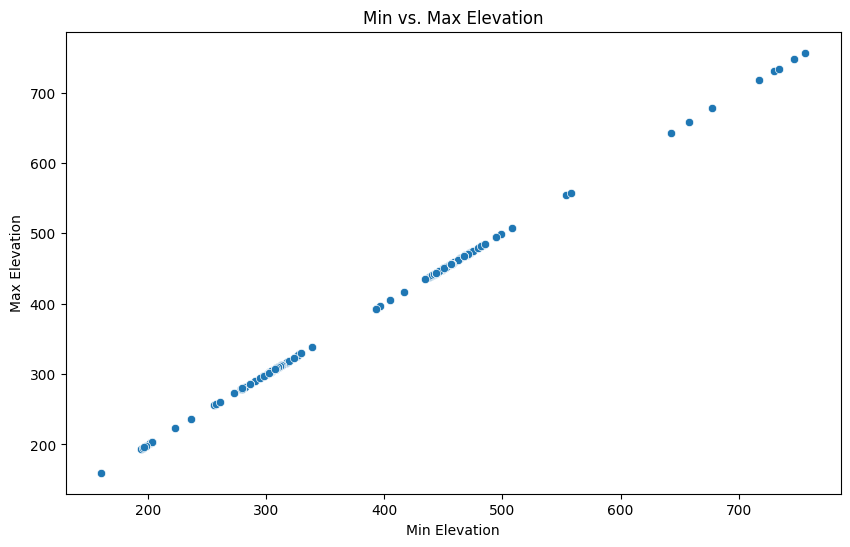

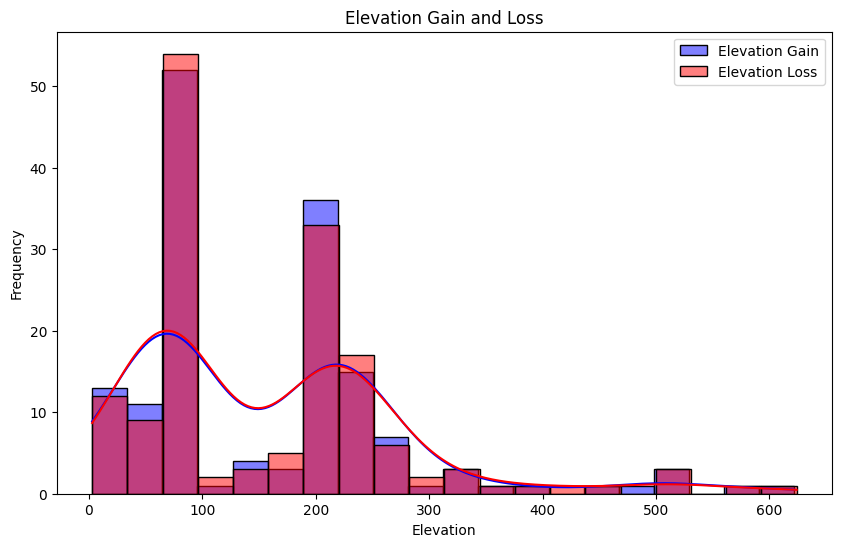

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to visualize min vs. max elevation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Min. Elevation (Raw)', y='Max. Elevation (Raw)', data=df)
plt.title('Min vs. Max Elevation')
plt.xlabel('Min Elevation')
plt.ylabel('Max Elevation')
plt.show()

# Histogram of elevation gains and losses
plt.figure(figsize=(10, 6))
sns.histplot(df['Elevation Gain (Raw)'], bins=20, kde=True, color='blue', label='Elevation Gain')
sns.histplot(df['Elevation Loss (Raw)'], bins=20, kde=True, color='red', label='Elevation Loss')
plt.title('Elevation Gain and Loss')
plt.xlabel('Elevation')
plt.ylabel('Frequency')
plt.legend()
plt.show()


We can clearly see that all of Maximum and Minimum Elevation values are the same, while there are still changes in elevation gain/ losses.

To deal with this problem, we will extract Elevation values from original .gpx files from 'activities' folder. This folder contains time-series data (second by second) of each activity, including `heart rate`, `cadence`, `elevation`, `longtitude`, and `lattitude`.

We will then replace the minimum elevation values from these files to the summary working file. 


In [66]:
import os
import gpxpy
import pandas as pd

# Path to the correct folder containing the .gpx files
activities_dir = os.path.join(os.getcwd(), 'activites','activites')


def gpx_to_min_elevation(gpx_file):
    """Parse a .gpx file to extract the minimum elevation."""
    with open(gpx_file, 'r') as file:
        gpx = gpxpy.parse(file)
        
    elevations = []
    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                elevations.append(point.elevation)
                
    if elevations:
        return min(elevations)
    else:
        return None

# Initialize list to store the new min elevations
new_min_elevations = []

# Loop over each row in the main DataFrame
for index, row in df.iterrows():
    activity_id = row['Activity ID']
    gpx_file_path = os.path.join(activities_dir, f'activity_{activity_id}.gpx')
    
    if os.path.exists(gpx_file_path):
        min_elevation = gpx_to_min_elevation(gpx_file_path)
        new_min_elevations.append(min_elevation)
    else:
        new_min_elevations.append(None)

# Replace the Min. Elevation (Raw) values in the DataFrame with the new values from the GPX files
df['Min. Elevation (Raw)'] = new_min_elevations

# Check for any remaining null values in the Min. Elevation (Raw) column
null_min_elevations = df['Min. Elevation (Raw)'].isna().sum()

# Display the result
print(f"Number of null values in Min. Elevation (Raw) after replacement: {null_min_elevations}")
print(df[['Activity ID', 'Min. Elevation (Raw)']].head(10))


Number of null values in Min. Elevation (Raw) after replacement: 0
   Activity ID  Min. Elevation (Raw)
0   2284658991            240.800003
1   2284658936            241.800003
2   2228102647            186.399994
3   2104984694            239.399994
4   2084195352            263.600006
5   2021230223            250.000000
6   2006998728            242.000000
7   2006998614            262.799988
8   1988390950            243.199997
9   1971778346            227.600006


In [67]:
def gpx_to_heart_rates(gpx_file):
    """Parse a .gpx file to extract all heart rate values and compute max and average."""
    with open(gpx_file, 'r') as file:
        gpx = gpxpy.parse(file)
        
    heart_rates = []
    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                # Assuming heart rate is stored as an extension in the GPX file
                if point.extensions:
                    for ext in point.extensions:
                        ns = {'ns3': 'http://www.garmin.com/xmlschemas/TrackPointExtension/v1'}
                        hr = ext.find('ns3:hr', namespaces=ns)
                        if hr is not None:
                            heart_rates.append(int(hr.text))
                
    if heart_rates:
        max_hr = max(heart_rates)
        avg_hr = sum(heart_rates) / len(heart_rates)
        return max_hr, avg_hr
    else:
        return None, None

# Initialize lists to store the new max and average heart rates
new_max_heart_rates = []
new_avg_heart_rates = []

# Loop over each row in the main DataFrame
for index, row in df.iterrows():
    activity_id = row['Activity ID']
    gpx_file_path = os.path.join(activities_dir, f'activity_{activity_id}.gpx')
    
    if os.path.exists(gpx_file_path):
        max_heart_rate, avg_heart_rate = gpx_to_heart_rates(gpx_file_path)
        new_max_heart_rates.append(max_heart_rate)
        new_avg_heart_rates.append(avg_heart_rate)
    else:
        new_max_heart_rates.append(None)
        new_avg_heart_rates.append(None)

# Replace the Max. Heart Rate (bpm) and Average Heart Rate (bpm) values in the DataFrame
df['Max. Heart Rate (bpm)'] = new_max_heart_rates
df['Average Heart Rate (bpm)'] = new_avg_heart_rates

# Check for any remaining null values in the Max. and Average Heart Rate (bpm) columns
null_max_heart_rates = df['Max. Heart Rate (bpm)'].isna().sum()
null_avg_heart_rates = df['Average Heart Rate (bpm)'].isna().sum()

# Display the result
print(f"Number of null values in Max. Heart Rate (bpm) after replacement: {null_max_heart_rates}")
print(f"Number of null values in Average Heart Rate (bpm) after calculation: {null_avg_heart_rates}")
print(df[['Activity ID', 'Max. Heart Rate (bpm)', 'Average Heart Rate (bpm)']].head(10))


Number of null values in Max. Heart Rate (bpm) after replacement: 64
Number of null values in Average Heart Rate (bpm) after calculation: 64
   Activity ID  Max. Heart Rate (bpm)  Average Heart Rate (bpm)
0   2284658991                  201.0                181.687995
1   2284658936                  197.0                184.637931
2   2228102647                  194.0                184.070773
3   2104984694                  197.0                180.211532
4   2084195352                  194.0                174.243100
5   2021230223                  192.0                176.274455
6   2006998728                  191.0                173.613708
7   2006998614                  196.0                176.866756
8   1988390950                  190.0                164.598989
9   1971778346                  192.0                172.784183


In [68]:
# Calculate the mean of the non-null values in Max. Heart Rate (bpm) and Average Heart Rate (bpm)
mean_max_heart_rate = df['Max. Heart Rate (bpm)'].mean()
mean_avg_heart_rate = df['Average Heart Rate (bpm)'].mean()

# Replace null values with the calculated mean
df['Max. Heart Rate (bpm)'].fillna(mean_max_heart_rate, inplace=True)
df['Average Heart Rate (bpm)'].fillna(mean_avg_heart_rate, inplace=True)

# Check for any remaining null values
null_max_heart_rates = df['Max. Heart Rate (bpm)'].isna().sum()
null_avg_heart_rates = df['Average Heart Rate (bpm)'].isna().sum()

# Display the result
print(f"Number of null values in Max. Heart Rate (bpm) after replacement with mean: {null_max_heart_rates}")
print(f"Number of null values in Average Heart Rate (bpm) after replacement with mean: {null_avg_heart_rates}")
print(df[['Activity ID', 'Max. Heart Rate (bpm)', 'Average Heart Rate (bpm)']].head(10))


Number of null values in Max. Heart Rate (bpm) after replacement with mean: 0
Number of null values in Average Heart Rate (bpm) after replacement with mean: 0
   Activity ID  Max. Heart Rate (bpm)  Average Heart Rate (bpm)
0   2284658991                  201.0                181.687995
1   2284658936                  197.0                184.637931
2   2228102647                  194.0                184.070773
3   2104984694                  197.0                180.211532
4   2084195352                  194.0                174.243100
5   2021230223                  192.0                176.274455
6   2006998728                  191.0                173.613708
7   2006998614                  196.0                176.866756
8   1988390950                  190.0                164.598989
9   1971778346                  192.0                172.784183


In [69]:
def gpx_to_min_heart_rate(gpx_file):
    """Parse a .gpx file to extract the minimum heart rate."""
    with open(gpx_file, 'r') as file:
        gpx = gpxpy.parse(file)
        
    heart_rates = []
    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                # Assuming heart rate is stored as an extension in the GPX file
                if point.extensions:
                    for ext in point.extensions:
                        ns = {'ns3': 'http://www.garmin.com/xmlschemas/TrackPointExtension/v1'}
                        hr = ext.find('ns3:hr', namespaces=ns)
                        if hr is not None:
                            heart_rates.append(int(hr.text))
                
    if heart_rates:
        return min(heart_rates)
    else:
        return None

# Initialize list to store the new min heart rates from the GPX files
gpx_min_heart_rates = []

# Loop over each row in the main DataFrame
for index, row in df.iterrows():
    activity_id = row['Activity ID']
    gpx_file_path = os.path.join(activities_dir, f'activity_{activity_id}.gpx')
    
    if os.path.exists(gpx_file_path):
        min_heart_rate = gpx_to_min_heart_rate(gpx_file_path)
        gpx_min_heart_rates.append(min_heart_rate)
    else:
        gpx_min_heart_rates.append(None)

# Compare the GPX min heart rates with the Max. Heart Rate (bpm).1 values
df['GPX Min Heart Rate'] = gpx_min_heart_rates
comparison = df[['Activity ID', 'Max. Heart Rate (bpm).1', 'GPX Min Heart Rate']]

# Calculate the differences
comparison['Min Heart Rate Difference'] = comparison['GPX Min Heart Rate'] - comparison['Max. Heart Rate (bpm).1']

# Display the comparison
print(comparison.head(10))

# Check how many are equal
equal_min_hr = (comparison['Max. Heart Rate (bpm).1'] == comparison['GPX Min Heart Rate']).sum()
total_entries = len(comparison)

print(f"Number of matches between Max. Heart Rate (bpm).1 and GPX Min Heart Rate: {equal_min_hr} out of {total_entries}")


   Activity ID  Max. Heart Rate (bpm).1  GPX Min Heart Rate  \
0   2284658991                      113               113.0   
1   2284658936                      100               149.0   
2   2228102647                       95               171.0   
3   2104984694                      109               109.0   
4   2084195352                      110               110.0   
5   2021230223                      101               101.0   
6   2006998728                       99               133.0   
7   2006998614                      100               100.0   
8   1988390950                       92               143.0   
9   1971778346                      123               145.0   

   Min Heart Rate Difference  
0                        0.0  
1                       49.0  
2                       76.0  
3                        0.0  
4                        0.0  
5                        0.0  
6                       34.0  
7                        0.0  
8                       51.

In [70]:
# Rename the 'Max. Heart Rate (bpm).1' column to 'Min Heart Rate (bpm)'
df.rename(columns={'Max. Heart Rate (bpm).1': 'Min Heart Rate (bpm)'}, inplace=True)
print(df[['Activity ID', 'Max. Heart Rate (bpm)', 'Average Heart Rate (bpm)', 'Min Heart Rate (bpm)']].head(10))


   Activity ID  Max. Heart Rate (bpm)  Average Heart Rate (bpm)  \
0   2284658991                  201.0                181.687995   
1   2284658936                  197.0                184.637931   
2   2228102647                  194.0                184.070773   
3   2104984694                  197.0                180.211532   
4   2084195352                  194.0                174.243100   
5   2021230223                  192.0                176.274455   
6   2006998728                  191.0                173.613708   
7   2006998614                  196.0                176.866756   
8   1988390950                  190.0                164.598989   
9   1971778346                  192.0                172.784183   

   Min Heart Rate (bpm)  
0                   113  
1                   100  
2                    95  
3                   109  
4                   110  
5                   101  
6                    99  
7                   100  
8                    92  
9 

In [71]:
df.to_csv('2nd_cleaned_activities.csv', index=False)


The cleaned data has been saved as '2nd_cleaned_activities.csv'.


A PARAGRAPH TO EXPLAIN TRAINING LOAD CALCULATION


In [72]:
# Convert 'Duration (h:m:s)' to total minutes
df['Duration (Minutes)'] = pd.to_timedelta(df['Duration (h:m:s)']).dt.total_seconds() / 60

# Calculate Intensity as a percentage of Max Heart Rate
df['Intensity'] = (df['Average Heart Rate (bpm)'] / df['Max. Heart Rate (bpm)']) * 100

# Calculate Training Load
df['Training Load'] = df['Intensity'] * df['Duration (Minutes)']

# Display the first few rows to verify the calculations
print(df[['Activity ID', 'Duration (Minutes)', 'Intensity', 'Training Load']].head(10))


   Activity ID  Duration (Minutes)  Intensity  Training Load
0   2284658991           59.050000  90.392038    5337.649817
1   2284658936           48.000000  93.724838    4498.792228
2   2228102647           39.300000  94.881842    3728.856386
3   2104984694           48.166667  91.477935    4406.187198
4   2084195352           47.666667  89.816031    4281.230802
5   2021230223           47.383333  91.809612    4350.245438
6   2006998728           64.950000  90.897229    5903.775046
7   2006998614           37.633333  90.238141    3395.962029
8   1988390950           90.366667  86.631047    7828.558954
9   1971778346           68.616667  89.991762    6174.934745
